In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# Metraż (m2)
X = np.array([25, 30, 45, 50, 65, 80, 95, 110]).reshape(-1, 1)

# Cena (tys. PLN)
y = np.array([180, 210, 310, 350, 430, 520, 610, 700])

In [5]:
model = Sequential([
    Dense(1, input_shape=(1,))
])
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001),
    loss='mse'
)
history = model.fit(
    X,
    y,
    epochs=200,
    verbose=0
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

[<Variable path=sequential_2/dense_2/kernel, shape=(1, 1), dtype=float32, value=[[6.5234976]]>, <Variable path=sequential_2/dense_2/bias, shape=(1,), dtype=float32, value=[0.32478628]>]


In [6]:
pred_70 = model.predict(np.array([[70]]), verbose=0)
print(f"Przewidywana cena dla 70 m2: {pred_70[0][0]:.2f} tys. PLN")

Przewidywana cena dla 70 m2: 456.97 tys. PLN


# Model ma dwa parametry trenowalne 1 wagę i 1 bias

# Waga odpowiada, o ile zwiększy się cena mieszkania wzraz ze wzrostem metrażu o 1m^2

# Bias to wartość początkowa ceny, czyli cena przy metrażu = 0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


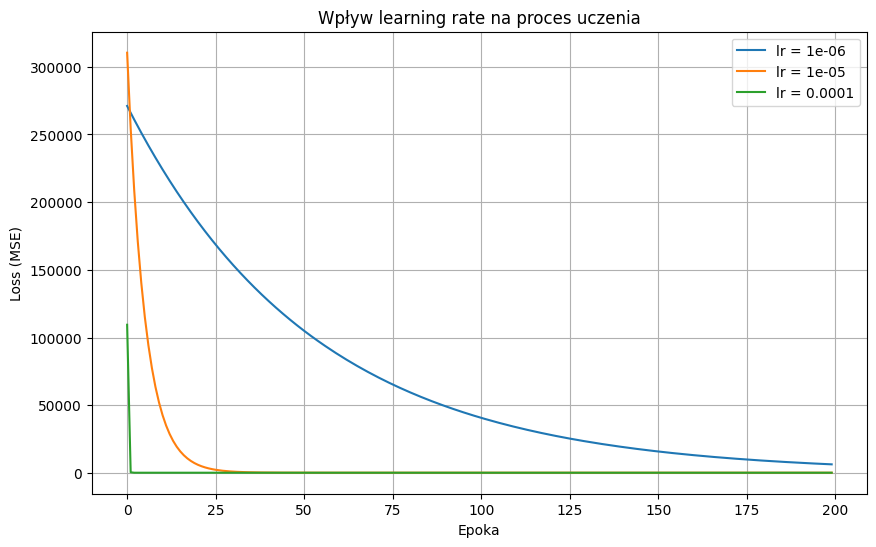

In [7]:
#2
learning_rates = [0.000001, 0.00001, 0.0001]
histories = {}

for lr in learning_rates:
    model = Sequential([
        Dense(1, input_shape=(1,))
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=lr),
        loss='mse'
    )

    history = model.fit(X, y, epochs=200, verbose=0)
    histories[lr] = history.history['loss']

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    plt.plot(histories[lr], label=f"lr = {lr}")

plt.xlabel("Epoka")
plt.ylabel("Loss (MSE)")
plt.title("Wpływ learning rate na proces uczenia")
plt.legend()
plt.grid(True)
plt.show()


# Najlepszym lr okazał się lr = 0.0001. Jak widzimy na wykresie zapewnia on najszybszy spadek błędu
# Gdybyśmy zmienili lr np na 0.0000001 uczenie przebiegło by znacznie wolniej i do osiągnięcia zadowalających wyników potrzebowaliśmy znacznie więcej epok.
# Do osiągnięcia zbiezności dla lr:
#0.0001 będzie to po 50 epoce
#0.00001 będzie to po 150 epoce
#0.000001 nawet przy 200 epokach nie mamy wyraźnej zbieżności